In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./dataset/airbnb_seasons_20172018/airbnb_cleaned_winter.csv')

In [3]:
df

,Unnamed: 0,id,host_id,scrape_id,zipcode,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,availability_30,minimum_nights,bathrooms,host_is_superhost,host_response_rate
0,0,16457286,11796099,20180110124902,11221,Bedford-Stuyvesant,Apartment,1.01,2,1.0,1.0,1.00,38.0,2,100.000000,0,14,1.0,0.0,0.0
1,1,1356652,4508795,20180110124902,11233,Bedford-Stuyvesant,Apartment,1.01,2,1.0,1.0,1.00,90.0,2,90.000000,30,2,1.0,0.0,0.0
2,2,775016,4088378,20180110124902,11221,Bedford-Stuyvesant,Apartment,1.01,2,1.0,1.0,1.01,90.0,1,100.000000,30,2,1.0,0.0,0.0
3,3,773497,4081688,20180110124902,11206,Bedford-Stuyvesant,Apartment,1.02,1,1.0,1.0,1.00,200.0,0,93.457844,30,1,1.0,0.0,0.0
4,4,8468835,6518093,20180110124902,11233,Bedford-Stuyvesant,Apartment,1.01,1,1.0,1.0,1.00,50.0,2,60.000000,0,1,1.0,0.0,0.0
5,5,2530757,2416281,20180110124902,11238,Bedford-Stuyvesant,House,1.00,4,2.0,2.0,1.01,160.0,0,93.457844,0,3,2.0,0.0,0.0
6,6,7363337,2259717,20180110124902,11221,Bedford-Stuyvesant,Apartment,1.01,4,1.0,2.0,1.00,101.0,7,91.000000,0,3,1.0,0.0,0.0
7,7,4624657,23952819,20180110124902,11221,Bedford-Stuyvesant,Townhouse,1.00,2,1.0,1.0,1.00,500.0,1,100.000000,27,1,1.0,0.0,60.0
8,8,5672471,142695,20180110124902,11216,Bedford-Stuyvesant,Apartment,1.01,2,1.0,1.0,1.00,65.0,0,93.457844,0,1,1.0,0.0,0.0
9,9,17299,67105,20180110124902,11233,Bedford-Stuyvesant,Apartment,1.00,8,3.0,5.0,1.00,180.0,35,81.000000,0,30,1.0,0.0,100.0


## Linear Regresson of Standardization

In [4]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [5]:
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = standardize_col(df[col])

df.head()

,Unnamed: 0,id,host_id,scrape_id,zipcode,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,availability_30,minimum_nights,bathrooms,host_is_superhost,host_response_rate
0,0,16457286,11796099,20180110124902,11221,Bedford-Stuyvesant,Apartment,1.01,-0.444028,-0.220786,-0.520291,1.00,38.0,-0.478513,100.000000,-0.749955,0.076030,-0.318193,0.0,0.0
1,1,1356652,4508795,20180110124902,11233,Bedford-Stuyvesant,Apartment,1.01,-0.444028,-0.220786,-0.520291,1.00,90.0,-0.478513,90.000000,2.084095,-0.024845,-0.318193,0.0,0.0
2,2,775016,4088378,20180110124902,11221,Bedford-Stuyvesant,Apartment,1.01,-0.444028,-0.220786,-0.520291,1.01,90.0,-0.507323,100.000000,2.084095,-0.024845,-0.318193,0.0,0.0
3,3,773497,4081688,20180110124902,11206,Bedford-Stuyvesant,Apartment,1.02,-0.985537,-0.220786,-0.520291,1.00,200.0,-0.536132,93.457844,2.084095,-0.033251,-0.318193,0.0,0.0
4,4,8468835,6518093,20180110124902,11233,Bedford-Stuyvesant,Apartment,1.01,-0.985537,-0.220786,-0.520291,1.00,50.0,-0.478513,60.000000,-0.749955,-0.033251,-0.318193,0.0,0.0


In [6]:
def findAveragePriceStandardize(location):
    return (df[(df.neighbourhood_cleansed == location)])

areaStandardize = findAveragePriceStandardize('Allerton')
areaStandardize.drop(['neighbourhood_cleansed'], axis=1)
areaStandardize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 45849 to 1029809
Data columns (total 20 columns):
Unnamed: 0                597 non-null int64
id                        597 non-null int64
host_id                   597 non-null int64
scrape_id                 597 non-null int64
zipcode                   597 non-null object
neighbourhood_cleansed    597 non-null object
property_type             597 non-null object
room_type                 597 non-null float64
accommodates              597 non-null float64
bedrooms                  597 non-null float64
beds                      597 non-null float64
bed_type                  597 non-null float64
price                     597 non-null float64
number_of_reviews         597 non-null float64
review_scores_rating      597 non-null float64
availability_30           597 non-null float64
minimum_nights            597 non-null float64
bathrooms                 597 non-null float64
host_is_superhost         597 non-null float64
host_

In [7]:
regStandardize = linear_model.LinearRegression()
regStandardize.fit(areaStandardize[['accommodates', 'beds', 'bedrooms', 'bathrooms']], areaStandardize.price)
#fit == training a model with the available points

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
regStandardize.coef_

array([ 20.91296297,   3.65619137, -10.44016401,  10.32419193])

In [9]:
regStandardize.intercept_

73.23963943326552

In [10]:
regStandardize.predict([[16, 2, 1, 1]])

array([415.04345764])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(areaStandardize[['accommodates', 'beds', 'bedrooms', 'bedrooms']],
    areaStandardize['price'], test_size = 0.3, random_state=42)

reg_standardize_all = LinearRegression()
reg_standardize_all.fit(X_train, y_train)
y_pred = reg_standardize_all.predict(X_test)

reg_standardize_all.score(X_test, y_test)

0.3217172373155607

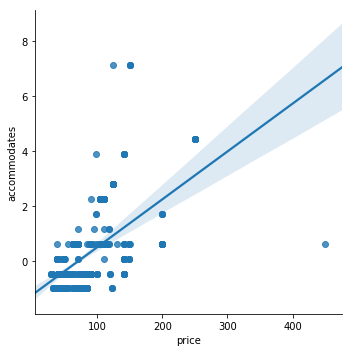

In [12]:
df_graph = findAveragePriceStandardize('Allerton')
#df_graph.plot.scatter(x = 'price', y ='accommodates', title = 'scatterplot')
sns.lmplot(x='price',y='accommodates',data=df_graph,fit_reg=True)